In [1]:
import configuration.configuration as cfg
import numpy as np
import omegak.omegak as wk
import matplotlib.pyplot as plt
import numpy as np

In [84]:
X = np.matlib.repmat(np.sin(np.pi/2*np.arange(0,200,0.1))*np.exp(-1j*np.pi/2*np.arange(0,200,0.1)), 1000, 1).T

In [85]:
X.shape

(2000, 1000)

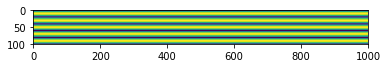

In [86]:
plt.imshow(np.abs(X[0:100]))
plt.show()

In [87]:
np.random.rand(2)

array([ 0.011764  ,  0.50512856])

In [88]:
newIdx = np.matlib.repmat(np.arange(2000) + np.random.rand(2000), 1000,1).T
newIdx[0:5,0:5]

array([[ 0.26065769,  0.26065769,  0.26065769,  0.26065769,  0.26065769],
       [ 1.71610132,  1.71610132,  1.71610132,  1.71610132,  1.71610132],
       [ 2.11643028,  2.11643028,  2.11643028,  2.11643028,  2.11643028],
       [ 3.57234266,  3.57234266,  3.57234266,  3.57234266,  3.57234266],
       [ 4.1376463 ,  4.1376463 ,  4.1376463 ,  4.1376463 ,  4.1376463 ]])

In [89]:
# First compute the FFT
(rows, cols) = X.shape
oversample = 8

# Switch to frequency domain and zero pad to oversample by oversample factor
YY = np.zeros((rows*oversample, cols), dtype=np.complex64)
idx0 = np.round(cfg.FFT_freq(rows,rows,0)).astype('int')
YY[idx0,:] = np.fft.fft(X, axis=0)
Y = np.fft.ifft(YY, axis=0)*oversample
(rowsY, cols) = Y.shape

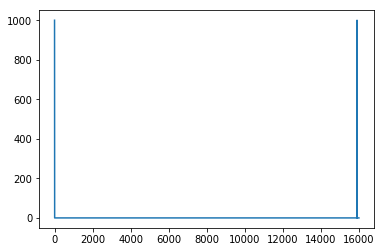

In [90]:
plt.plot(np.abs(YY[:,1]))
plt.show()

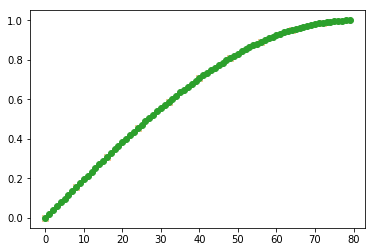

In [91]:
plt.plot(8*np.arange(10), np.abs(X[0:10,20]))
plt.plot(8*np.arange(10), np.abs(X[0:10,20]),'x')
plt.plot(np.arange(80), np.abs(Y[0:(8*10),20]),'o')
plt.show()

In [92]:
interpData = wk.interpolateCxInt(X, newIdx, 8)

In [93]:
interpData[0:5,0:5]

array([[ 0.04089549-0.00170541j,  0.04089549-0.00170541j,
         0.04089549-0.00170541j,  0.04089549-0.00170541j,
         0.04089549-0.00170541j],
       [ 0.25665570-0.07098757j,  0.25665570-0.07098757j,
         0.25665570-0.07098757j,  0.25665570-0.07098757j,
         0.25665570-0.07098757j],
       [ 0.30847375-0.10652912j,  0.30847375-0.10652912j,
         0.30847375-0.10652912j,  0.30847375-0.10652912j,
         0.30847375-0.10652912j],
       [ 0.45046211-0.28322844j,  0.45046211-0.28322844j,
         0.45046211-0.28322844j,  0.45046211-0.28322844j,
         0.45046211-0.28322844j],
       [ 0.48172915-0.36620176j,  0.48172915-0.36620176j,
         0.48172915-0.36620176j,  0.48172915-0.36620176j,
         0.48172915-0.36620176j]])

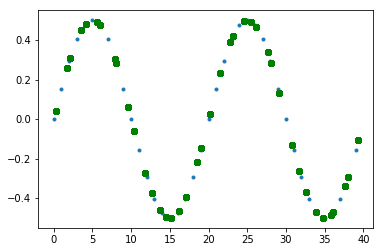

In [95]:
plt.plot(np.arange(40), np.real(X[0:40,0]),'.')
plt.plot(newIdx[0:40,:], np.real(interpData[0:40,0]),'go')
plt.show()

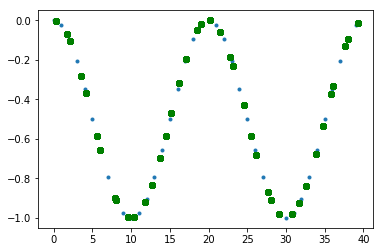

In [96]:
plt.plot(np.arange(40), np.imag(X[0:40,0]),'.')
plt.plot(newIdx[0:40,:], np.imag(interpData[0:40,0]),'go')
plt.show()